# Tutorial 2 - Solving Linear Systems

In this notebook, we will study numerical methods for solving systems of linear equations:

$$
A x = b, \quad A \in \mathbb{R}^{n \times n}, \, x, b \in \mathbb{R}^n.
$$

Why we care about solving 
𝐴
𝑥
=
𝑏
Ax=b in numerical methods (e.g., arises in ODEs, PDEs, optimization, physics).

Exact solution: $ x=A^{-1}b $, but computing $ A^{-1} $ explicitly is costly/unstable.

Numerical algorithms instead use factorizations or iterative schemes.

Such systems appear everywhere in scientific computing:
- discretization of differential equations (ODEs, PDEs),
- optimization problems,
- physical simulations,
- statistical models.

We will study **direct methods** (exact in theory) and **iterative methods** (successive approximations).

## 1. Direct Methods
Introduce algorithms that give the solution in a finite number of steps (up to roundoff):

- Gauss-Jordan elimination (concept, matrix reduction).

- LU decomposition (and forward/backward substitution).

- Cholesky decomposition (special case for symmetric positive definite matrices).

### 1.1 Gauss-Jordan Elimination
We augment $A$ with $b$ and apply row operations until $A$ becomes the identity:
$$
[A | b] \;\longrightarrow\; [I | x].
$$

In [1]:
from numethods.linalg import Matrix, Vector
from numethods.solvers import GaussJordan

A = Matrix([[2, 1], [5, 7]])
b = Vector([11, 13])
solver = GaussJordan(A)
x = solver.solve(b)
print("Gauss–Jordan solution:", x)

Gauss–Jordan solution: Vector([7.111111111111111, -3.2222222222222223])


### 1.2 LU Decomposition

Factorization:
$$
A = L U,
$$
with $L$ lower-triangular, $U$ upper-triangular.

In [2]:
from numethods.solvers import LUDecomposition

A = Matrix([[3, 1], [6, 3]])
b = Vector([5, 12])
solver = LUDecomposition(A)
x = solver.solve(b)
print("LU solution:", x)

LU solution: Vector([1.0, 2.0])


### 1.3 Cholesky Decomposition

For symmetric positive-definite (SPD) matrices:
$$
A = L L^T.
$$

In [8]:
from numethods.solvers import Cholesky

A = Matrix([[4, 2], [2, 4]])
b = Vector([6, 5])
solver = Cholesky(A)
x = solver.solve(b)
print("Cholesky solution:", x)

Cholesky solution: Vector([1.1666666666666665, 0.6666666666666667])


## 2. Iterative Methods

### 2.1 Jacobi Iteration

Update:
$$
x_i^{(k+1)} = \frac{1}{a_{ii}}\Big(b_i - \sum_{j\ne i} a_{ij}x_j^{(k)}\Big).
$$

In [4]:
from numethods.solvers import Jacobi

A = Matrix([[4, -1, 0, 0],
            [-1, 4, -1, 0],
            [0, -1, 4, -1],
            [0, 0, -1, 3]])
b = Vector([15, 10, 10, 10])
solver = Jacobi(A, b, tol=1e-8, max_iter=100)
x = solver.solve()
print("Jacobi solution:", x)

Jacobi solution: Vector([4.999999991891302, 4.999999985914916, 4.999999984848761, 4.999999987766864])


### 2.2 Gauss-Seidel Iteration

Update:
$$
x_i^{(k+1)} = \frac{1}{a_{ii}}\Big(b_i - \sum_{j<i} a_{ij}x_j^{(k+1)} - \sum_{j>i} a_{ij}x_j^{(k)}\Big).
$$

In [5]:
from numethods.solvers import GaussSeidel

solver = GaussSeidel(A, b, tol=1e-8, max_iter=100)
x = solver.solve()
print("Gauss–Seidel solution:", x)

Gauss–Seidel solution: Vector([4.999999973600783, 4.999999981068349, 4.999999991156471, 4.999999997052157])


## 3. Convergence

The residual is:
$$
r^{(k)} = b - A x^{(k)}.
$$

A good stopping rule: $\|r^{(k)}\| < tol$.

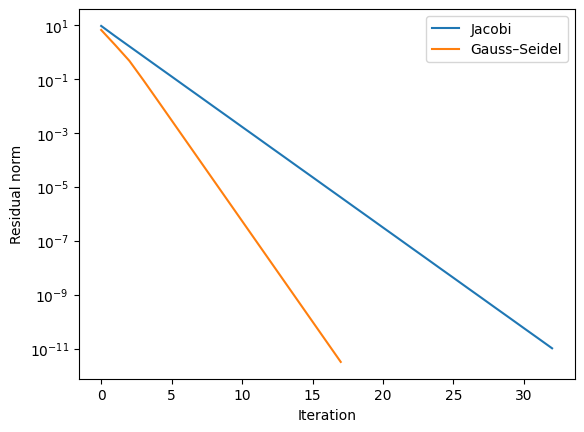

In [6]:
import matplotlib.pyplot as plt

solver_j = Jacobi(A, b, tol=1e-12, max_iter=50)
xj = solver_j.solve()
res_j = solver_j.history

solver_gs = GaussSeidel(A, b, tol=1e-12, max_iter=50)
xgs = solver_gs.solve()
res_gs = solver_gs.history

plt.semilogy(res_j, label="Jacobi")
plt.semilogy(res_gs, label="Gauss–Seidel")
plt.xlabel("Iteration")
plt.ylabel("Residual norm")
plt.legend()
plt.show()

## 4. Summary

- Direct: Gauss–Jordan, LU, Cholesky.
- Iterative: Jacobi, Gauss–Seidel.
- Convergence depends on matrix properties (e.g., diagonal dominance, SPD).
- Direct methods better for small/moderate dense systems.
- Iterative methods essential for large, sparse systems (e.g., PDE discretizations).
- Conditioning of matrix affects stability.